In [57]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
import csv
reader = csv.reader(open("hepatitis_2_csv.csv", "r"))
x = list(reader)
res = np.array(x).astype("float")

In [28]:
training_class_name=res[0:568,19:20];
training_data=res[0:568,0:19];
training_data=np.matrix(training_data)
training_class_name=np.matrix(training_class_name)

In [89]:
#a=np.matrix([[1,2,3,4,5],[2,3,4,5,1],[3,4,5,1,2],[4,5,1,2,3],[5,1,2,3,4]])
#b=a.transpose()
#print(a)
#print(b)
#np.sum(a,b,axis=1)
abcdef=np.matrix([.0000001,1,.0000001,.0000001,.0000001,.0000001,.0000001,.0000001,.0000001])
bcadef=np.matrix([.0000002,.0000002,.0000002,.0000002,.0000002,.0000002,.0000002,.0000002,.0000002])
np.add(abcdef,bcadef)
#abc=(1/len(abc))*abc

matrix([[3.0000000e-07, 1.0000002e+00, 3.0000000e-07, 3.0000000e-07,
         3.0000000e-07, 3.0000000e-07, 3.0000000e-07, 3.0000000e-07,
         3.0000000e-07]])

In [107]:
for i in range(0,1):
    u1.output(training_data,training_class_name)

0.5214169593407552


In [196]:
training_data.shape[1]

19

In [244]:
class Unit:
    
    def __init__(self,activation):
        # self.activation="sigmoid"
        self.activation=activation
        print("Activation set as Sigmoid")
        
    def sigmoid(self,X):
        return 1/(1+np.exp(-X));
  
    def tanh(self,X):
        return np.tanh(X);

    def relu(self,X):
        return np.maximum(0, X);
        
    def getActivation(self):
        # plot the activation function using matplotlib library
        cur_axes = plt.gca()
        # to remove the x axis
        cur_axes.axes.get_xaxis().set_visible(False)
        rangex=np.linspace(-10, 10, 100)
        
        if(self.activation=="sigmoid"):
            plt.plot(rangex,self.sigmoid(rangex))
        elif(self.activation=="tanh"):
            plt.plot(rangex,self.tanh(rangex))
        elif(self.activation=="relu"):
            plt.plot(rangex,self.relu(rangex))
        plt.title("activation function = "+self.activation)
        
    def train(self,epochs,inputmatrix,outputmatrix):
        self.weights=0.01*np.random.rand(inputmatrix.shape[1],1)
        for i in range(0,epochs):
            self.output(inputmatrix,outputmatrix)
            
    def output(self,inputmatrix,outputmatrix):
        self.ipv=np.dot(inputmatrix,self.weights)
        self.result=self.sigmoid(self.ipv)
        cost=self.costfunc(inputmatrix,outputmatrix)
        print(cost)
        self.optimization(0.1,inputmatrix,outputmatrix)
        
    def costfunc(self,inputmatrix,outputmatrix):
        one=np.ones(outputmatrix.shape)
        cost=(np.sum((np.multiply(outputmatrix,np.log(self.result)),np.multiply((np.subtract(one,outputmatrix)),np.log(np.subtract(one,self.result))))))
        #cost=(np.multiply(outputmatrix,np.log(self.result)))
        cost=(-1/len(inputmatrix))*cost
        return cost
    
    def optimization(self,learningRate,inputmatrix,outputmatrix):
        delta=((learningRate/len(self.weights))*np.matmul(inputmatrix.transpose(),np.subtract(self.result,outputmatrix)))
        self.weights=self.weights-delta
                                    
    def parameters(self):
        parameters={"weights":self.weights,"activation":self.activation}
        print("Weights = {}".format(parameters["weights"]))
        print("activation = {}".format(parameters["activation"]))
        return parameters
        
    @classmethod
    def info(cls):
        print("This is a neural network unit which takes the output of previous unit and corresponding weights.\n It takes the product of both and is passes on to the activation function to get the output")
        
    

In [245]:
u1=Unit(activation="sigmoid")

Activation set as Sigmoid


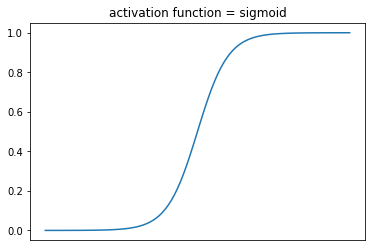

In [246]:
u1.getActivation()

In [247]:
u1.train(10,training_data,training_class_name)

0.4986003099180007
nan
nan
nan
nan
nan
nan
nan
nan
nan


C:\Users\vedha krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
C:\Users\vedha krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply


In [248]:
params=u1.parameters()
params["weights"].shape

Weights = [[ 2.85711363e+01]
 [ 7.14346223e-01]
 [ 4.10243047e-01]
 [ 6.25195074e-01]
 [-7.96328585e-01]
 [-1.42759672e+00]
 [-3.77034588e-01]
 [ 6.86427655e-01]
 [ 6.11660757e-02]
 [-6.28593598e-01]
 [-1.63847451e+00]
 [-3.20257919e+00]
 [-1.47257052e+00]
 [-5.05947816e+00]
 [ 4.41156841e+01]
 [ 5.85995131e+01]
 [ 8.12761916e+00]
 [ 1.59706143e+02]
 [-1.40362934e+00]]
activation = sigmoid


(19, 1)

In [ ]:

class Layers:
    def __init__(self):
        pass
    class Deep:
        def __init__(self,numberOfUnits,otherdata):
            